# Pooja Roy Choudhary - INSOFE

# Final_Hack_Batch92

## Broadband Outage Detection

## ProblemDescription

## PROBLEM TYPE: CLASSIFICATION

## Domain: Telecommunication

### Evaluation Metric: F1 Macro Average

# About Data

## Objectives:

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from functools import reduce
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix

## Read Datasets

In [2]:
# broadband data
broadband_df = pd.read_csv("/home/datasets/exam/finalhackathon/broadband_data.csv")

# outage data
outage_df = pd.read_csv("/home/datasets/exam/finalhackathon/outage_data.csv")

# report data
report_df = pd.read_csv("/home/datasets/exam/finalhackathon/report_data.csv")

# server data
server_df = pd.read_csv("/home/datasets/exam/finalhackathon/server_data.csv")

# train data
train_df = pd.read_csv("/home/datasets/exam/finalhackathon/train_data.csv")

## Exploring the datasets

## Broadband Data

### See the first five records

In [3]:
broadband_df.head()

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8


### Number of records and columns

In [4]:
broadband_df.shape

(21076, 2)

### Compute the data distribution by levels

In [5]:
broadband_df.nunique()

id                18552
broadband_type       10
dtype: int64

In [6]:
print(f"There are {broadband_df.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


## Creating a dictionary for broadband types with key as the type and name as the value

In [7]:
broadband_type_dict = {  'broadband_type_8'  : 'ADSL 1',
                         'broadband_type_2'  : 'ADSL 2',
                         'broadband_type_6'  : 'ADSL 2+',
                         'broadband_type_7'  : 'Cable',
                         'broadband_type_4'  : 'Fiber 1',
                         'broadband_type_9'  : 'BPL',
                         'broadband_type_3'  : 'Fiber 2',
                         'broadband_type_10' : 'Fiber High Speed',
                         'broadband_type_1'  : 'Fiber Ultra',
                         'broadband_type_5'  : 'Fiber Ultra Max'}

### Mapping the values of the dictionary broadband_type_dict based on the broadband_name as the key

In [8]:
broadband_df['broadband_name']=broadband_df.broadband_type.map(broadband_type_dict)

In [9]:
broadband_df.head(10)

,id,broadband_type,broadband_name
0,6597,broadband_type_8,ADSL 1
1,8011,broadband_type_8,ADSL 1
2,2597,broadband_type_8,ADSL 1
3,5022,broadband_type_8,ADSL 1
4,6852,broadband_type_8,ADSL 1
5,5611,broadband_type_8,ADSL 1
6,14838,broadband_type_8,ADSL 1
7,2588,broadband_type_8,ADSL 1
8,4848,broadband_type_8,ADSL 1
9,6914,broadband_type_8,ADSL 1


In [10]:
broadband_df.shape

(21076, 3)

### Display data type

In [11]:
broadband_df.dtypes

id                 int64
broadband_type    object
broadband_name    object
dtype: object

### Converting to appropriate datatype

In [12]:
categorical_list = ["broadband_type","broadband_name"]

In [13]:
broadband_df[categorical_list] = broadband_df[categorical_list].astype('category')

In [14]:
broadband_df.dtypes

id                   int64
broadband_type    category
broadband_name    category
dtype: object

## Checking the distribution of broadband type

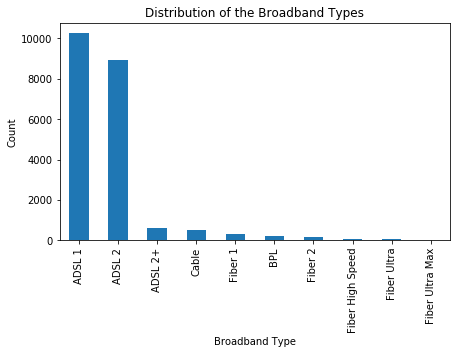

In [15]:
plt.figure(figsize=(7,4))
broadband_df.broadband_name.value_counts().plot(kind='bar')
plt.xlabel('Broadband Type')
plt.ylabel('Count')
plt.title('Distribution of the Broadband Types')
plt.show()

### Value Count for Broadband Data

In [16]:
 broadband_df['broadband_type'].value_counts()

broadband_type_8     10268
broadband_type_2      8918
broadband_type_6       582
broadband_type_7       498
broadband_type_4       330
broadband_type_9       190
broadband_type_3       145
broadband_type_10       73
broadband_type_1        58
broadband_type_5        14
Name: broadband_type, dtype: int64

### OBSERVATION:

### Broadband types description

### On exploring the data set we find that the broadband company has recorded most of the complaints where the broadband type was Either ADSL 1 or ADSL 2 where the Fiber type of broadbands have registered the least complaints

### Percentage of Broadband types through Value counts in the Data

In [17]:
val=list(broadband_df['broadband_type'].value_counts())
for i in range(len(val)):
    print(broadband_df['broadband_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

broadband_type_8 49 %
broadband_type_2 42 %
broadband_type_6 3 %
broadband_type_7 2 %
broadband_type_4 2 %
broadband_type_9 1 %
broadband_type_3 1 %
broadband_type_10 0 %
broadband_type_1 0 %
broadband_type_5 0 %


### Feature Engineering

### Replacing the columns Fiber 1, Fiber 2, Fiber High Speed, Fiber Ultra, Fiber Ultra Max with Fiber for reducing the levels. 

In [18]:
broadband_df["broadband_name"].replace({"Fiber 1": "Fiber", "Fiber 2": "Fiber","Fiber High Speed": "Fiber", "Fiber Ultra": "Fiber", "Fiber Ultra Max": "Fiber"}, inplace=True)

In [19]:
broadband_df.broadband_name.value_counts()

ADSL 1     10268
ADSL 2      8918
Fiber        620
ADSL 2+      582
Cable        498
BPL          190
Name: broadband_name, dtype: int64

## Transforming the categorical columns to numerical as needed for the model building

In [20]:
broadband_df = broadband_df[['id','broadband_name']].pivot_table(values='broadband_name',index='id',columns='broadband_name',fill_value=0,aggfunc=len)

In [21]:
broadband_df.head()

broadband_name,ADSL 1,ADSL 2,ADSL 2+,BPL,Cable,Fiber
id,,,,,,
1,1,0,1,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0


In [22]:
broadband_df.columns

Index(['ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL', 'Cable', 'Fiber'], dtype='object', name='broadband_name')

In [23]:
broadband_df.columns = ['ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL', 'Cable', 'Fiber']
broadband_df.head()

,ADSL 1,ADSL 2,ADSL 2+,BPL,Cable,Fiber
id,,,,,,
1,1,0,1,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0


In [24]:
broadband_df.reset_index(inplace=True)
broadband_df.head()

,id,ADSL 1,ADSL 2,ADSL 2+,BPL,Cable,Fiber
0,1,1,0,1,0,0,0
1,2,0,1,0,0,0,0
2,3,1,0,0,0,0,0
3,4,0,1,0,0,0,0
4,5,0,1,0,0,0,0


In [297]:
#broadband_df.Fiber.value_counts()

### Check for missing/null values

In [26]:
broadband_df.isnull().sum()

id         0
ADSL 1     0
ADSL 2     0
ADSL 2+    0
BPL        0
Cable      0
Fiber      0
dtype: int64

In [27]:
broadband_df.shape

(18552, 7)

# Outage data

#### outage_data.csv: For each of the event ids mentioned in the train_data.csv and test_data.csv files and also some additional ids there is a record of the outage_type that is stored in the dataset. There are 5 different outage_type's recorded in the dataset.

## See the first five records

In [28]:
outage_df.head()

,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1


### Number of records and columns

In [29]:
outage_df.shape

(18552, 2)

### Display data type

In [30]:
outage_df.dtypes

id              int64
outage_type    object
dtype: object

### Compute the data distribution by levels

In [31]:
outage_df.nunique()

id             18552
outage_type        5
dtype: int64

In [32]:
outage_df.outage_type.value_counts()

outage_type_2    8737
outage_type_1    8728
outage_type_4    1014
outage_type_5      65
outage_type_3       8
Name: outage_type, dtype: int64

In [33]:
print(f"There are {outage_df.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.



### Plotting the number of counts of Outage Type

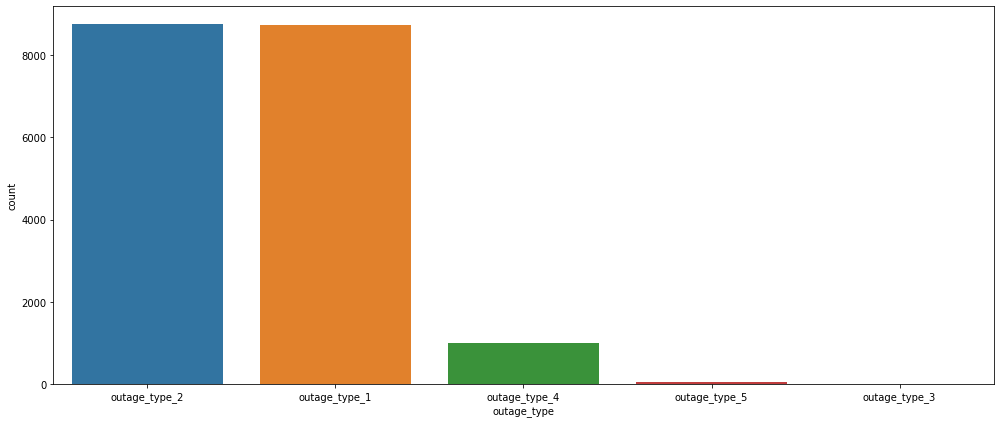

In [34]:
#count plot for Outage Duration

plt.figure(figsize = (14,6))
sns.countplot(outage_df['outage_type'])
plt.tight_layout()
plt.show()

### Feature Engineering

### Replacing the columns outage_type_5, outage_type_3 with outage_type_6 for reducing the levels.

In [35]:
outage_df["outage_type"].replace({"outage_type_5": "outage_type_6", "outage_type_3": "outage_type_6"}, inplace=True)

In [36]:
outage_df.outage_type.value_counts()

outage_type_2    8737
outage_type_1    8728
outage_type_4    1014
outage_type_6      73
Name: outage_type, dtype: int64

In [37]:
outage_df.shape

(18552, 2)

### Converting to appropriate datatype

In [38]:
categorical_list1 = ["outage_type"]

In [39]:
outage_df[categorical_list1] = outage_df[categorical_list1].astype('category')

In [40]:
outage_df.dtypes

id                int64
outage_type    category
dtype: object

In [41]:
outage_df.outage_type.value_counts(normalize=True)

outage_type_2    0.470947
outage_type_1    0.470461
outage_type_4    0.054657
outage_type_6    0.003935
Name: outage_type, dtype: float64

In [42]:
# description of the data
outage_df.describe(include='all')

,id,outage_type
count,18552.000000,18552
unique,NaN,4
top,NaN,outage_type_2
freq,NaN,8737
mean,9276.500000,NaN
std,5355.645433,NaN
min,1.000000,NaN
25%,4638.750000,NaN
50%,9276.500000,NaN
75%,13914.250000,NaN


### OBSERVATION

## Transforming the categorical columns to numerical as needed for the model building

In [43]:
outage_df = outage_df.pivot_table(values='outage_type',index='id',columns='outage_type',fill_value=0,aggfunc=len)

In [44]:
outage_df.head()

outage_type,outage_type_1,outage_type_2,outage_type_4,outage_type_6
id,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0


In [45]:
outage_df.shape

(18552, 4)

In [46]:
outage_df.columns = outage_df.columns.categories

In [47]:
outage_df.head()

,outage_type_1,outage_type_2,outage_type_4,outage_type_6
id,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0


In [48]:
outage_df.reset_index(inplace=True)
outage_df.head()

,id,outage_type_1,outage_type_2,outage_type_4,outage_type_6
0,1,1,0,0,0
1,2,0,1,0,0
2,3,1,0,0,0
3,4,0,0,1,0
4,5,0,1,0,0


### Check for missing/null values

In [49]:
outage_df.isnull().sum()

id               0
outage_type_1    0
outage_type_2    0
outage_type_4    0
outage_type_6    0
dtype: int64

# Report data

#### report_data.csv: For each event id there are log_report_type and volume columns are recorded. log_report_type is a type of the recorded report generated by a technical team member after evaluating the outage. volume is the volume of data handled in the area at the time of report in custom company specific units.

## See the first five records

In [50]:
report_df.head()

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


### Number of records and columns

In [51]:
report_df.shape

(58671, 3)

### Display data type

In [52]:
report_df.dtypes

id                  int64
log_report_type    object
volume              int64
dtype: object

### Compute the data distribution by levels

In [53]:
report_df.nunique()

id                 18552
log_report_type      386
volume               341
dtype: int64

In [54]:
print(f"There are {report_df.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


### Summary of report_df

In [55]:
report_df.describe(include='all')

,id,log_report_type,volume
count,58671.000000,58671,58671.000000
unique,NaN,386,NaN
top,NaN,log_report_type_312,NaN
freq,NaN,5267,NaN
mean,9271.368905,NaN,9.685296
std,5355.142878,NaN,27.314433
min,1.000000,NaN,1.000000
25%,4658.500000,NaN,1.000000
50%,9275.000000,NaN,2.000000
75%,13903.000000,NaN,7.000000


### Since there are a total of 386 unique reports it will be difficult to visualize all 386 in a single frame, hence lets see what are the top 20 most frequent log_report_type

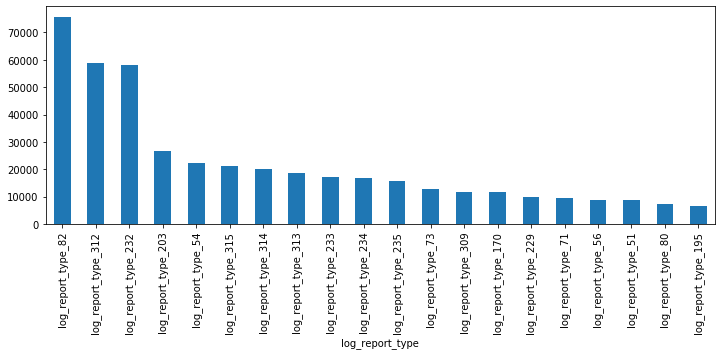

In [56]:
plt.figure(figsize=(12,4))
report_df.groupby('log_report_type')['volume'].sum().nlargest(20).plot(kind='bar')
plt.show()

### Now lets see what are the ids that registered most complaints, by visualizing the 50 most frequent ids and their frequencies

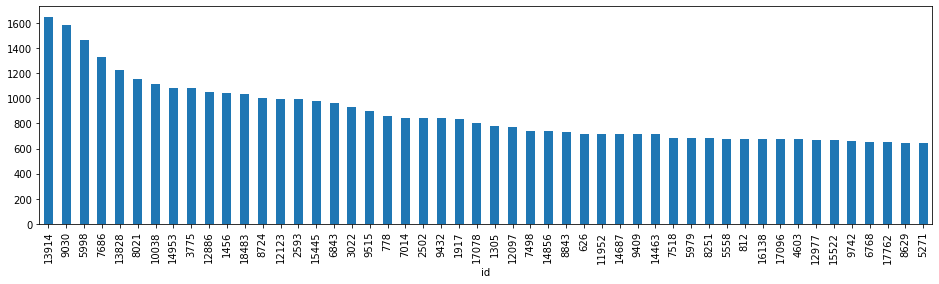

In [57]:
plt.figure(figsize=(16,4))
report_df.groupby('id')['volume'].sum().nlargest(50).plot(kind='bar')
plt.show()

### Total volume (in masked units) is highest in the ID 13914 which is 1649 units.

### OBSERVATION

### Converting to appropriate datatype

In [58]:
categorical_list2 = ["log_report_type"]

In [59]:
report_df[categorical_list2] = report_df[categorical_list2].astype('category')

In [60]:
report_df.dtypes

id                    int64
log_report_type    category
volume                int64
dtype: object

In [61]:
report_df['log_report_type'].value_counts()

log_report_type_312    5267
log_report_type_232    4754
log_report_type_82     3472
log_report_type_203    2823
log_report_type_313    2145
                       ... 
log_report_type_32        1
log_report_type_31        1
log_report_type_300       1
log_report_type_3         1
log_report_type_272       1
Name: log_report_type, Length: 386, dtype: int64

### OBSERVATION

### Transforming the categorical columns to numerical as needed for the model building

In [62]:
report_volume_df = pd.DataFrame(report_df.groupby('id')['volume'].sum()).reset_index()
report_volume_df.rename(columns={'volume':'report_volume'})
report_volume_df.head()

,id,volume
0,1,5
1,2,5
2,3,2
3,4,3
4,5,17


In [295]:
report_volume_df

,id,volume
0,1,5
1,2,5
2,3,2
3,4,3
4,5,17
...,...,...
18547,18548,22
18548,18549,8
18549,18550,6
18550,18551,7


In [64]:
report_df = report_df.pivot_table(values ='volume',index='id',columns='log_report_type',fill_value=0,aggfunc=np.sum)

In [65]:
report_df.columns = report_df.columns.categories

In [293]:
report_df.head(30)

,id,log_report_type_1,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,...,log_report_type_90,log_report_type_91,log_report_type_92,log_report_type_93,log_report_type_94,log_report_type_95,log_report_type_96,log_report_type_97,log_report_type_98,log_report_type_99
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,33,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
report_df.columns = report_df.columns
report_df.head()

,log_report_type_1,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,log_report_type_107,...,log_report_type_90,log_report_type_91,log_report_type_92,log_report_type_93,log_report_type_94,log_report_type_95,log_report_type_96,log_report_type_97,log_report_type_98,log_report_type_99
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
report_df.reset_index(inplace=True)
report_df.head()

,id,log_report_type_1,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,...,log_report_type_90,log_report_type_91,log_report_type_92,log_report_type_93,log_report_type_94,log_report_type_95,log_report_type_96,log_report_type_97,log_report_type_98,log_report_type_99
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for missing/null values

In [69]:
report_df.isnull().values.any()

False

In [70]:
report_df.shape

(18552, 387)

# Server Data

#### server_data.csv: For each of the event ids mentioned in the train_data.csv and test_data.csv files and also some additional ids there is a record of the transit_server_type that is stored in the dataset. Transit Servers handle the requests and responses of the customers.

## See the first five records

In [71]:
server_df.head()

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


### Number of records and columns

In [72]:
server_df.shape

(31170, 2)

### Display data type

In [73]:
server_df.dtypes

id                      int64
transit_server_type    object
dtype: object

### Compute the data distribution by levels

In [74]:
server_df.nunique()

id                     18552
transit_server_type       53
dtype: int64

In [75]:
print(f"There are {server_df.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


In [76]:
server_count = server_df['transit_server_type'].value_counts()
server_count

transit_server_type_11    7888
transit_server_type_35    6615
transit_server_type_34    5927
transit_server_type_15    4395
transit_server_type_20    1458
transit_server_type_54     684
transit_server_type_13     582
transit_server_type_42     478
transit_server_type_44     466
transit_server_type_23     429
transit_server_type_14     330
transit_server_type_43     306
transit_server_type_22     223
transit_server_type_50     154
transit_server_type_10     145
transit_server_type_21     136
transit_server_type_18      73
transit_server_type_47      69
transit_server_type_26      65
transit_server_type_32      63
transit_server_type_30      60
transit_server_type_45      53
transit_server_type_24      46
transit_server_type_27      44
transit_server_type_29      42
transit_server_type_40      40
transit_server_type_46      38
transit_server_type_2       37
transit_server_type_28      32
transit_server_type_8       29
transit_server_type_6       28
transit_server_type_5       26
transit_

### Checking the Value count with percentage wise

In [77]:
val=list(server_df['transit_server_type'].value_counts().head(15))
for i in range(len(val)):
    print(server_df['transit_server_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

transit_server_type_11 26 %
transit_server_type_35 22 %
transit_server_type_34 20 %
transit_server_type_15 15 %
transit_server_type_20 5 %
transit_server_type_54 2 %
transit_server_type_13 2 %
transit_server_type_42 2 %
transit_server_type_44 2 %
transit_server_type_23 1 %
transit_server_type_14 1 %
transit_server_type_43 1 %
transit_server_type_22 1 %
transit_server_type_50 1 %
transit_server_type_10 0 %


### Converting to appropriate datatype

In [78]:
categorical_list3 = ["transit_server_type"]

In [79]:
server_df[categorical_list3] = server_df[categorical_list3].astype('category')

In [80]:
server_df.dtypes

id                        int64
transit_server_type    category
dtype: object

In [81]:
server_df.describe(include='all')

,id,transit_server_type
count,31170.000000,31170
unique,NaN,53
top,NaN,transit_server_type_11
freq,NaN,7888
mean,9267.735258,NaN
std,5363.817181,NaN
min,1.000000,NaN
25%,4625.250000,NaN
50%,9287.500000,NaN
75%,13915.000000,NaN


### Let's visualize the 20 most frequent transit_server_type and their frequencies

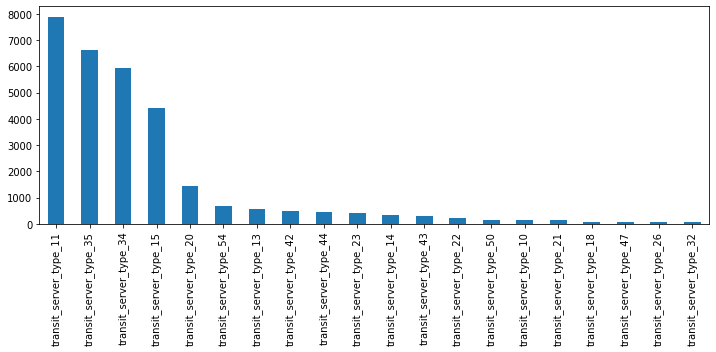

In [82]:
plt.figure(figsize=(12,4))
server_df.transit_server_type.value_counts().nlargest(20).plot(kind='bar')
plt.show()

### Transforming the categorical columns to numerical as needed for the model building

In [83]:
server_df = server_df.pivot_table(values='transit_server_type',index='id',columns='transit_server_type',fill_value=0,aggfunc=len)
server_df.head()

transit_server_type,transit_server_type_1,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,...,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
server_df.columns = server_df.columns.categories
server_df.head()

,transit_server_type_1,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,...,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
server_df.reset_index(inplace=True)
server_df.head()

,id,transit_server_type_1,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,...,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for missing/null values

In [86]:
server_df.isnull().values.any()

False

In [87]:
server_df.shape

(18552, 54)

# Train Data

### train_data.csv: It has a unique event id for each observation of the outage_duration in a particular area_code

### See the first five records

In [88]:
train_df.head()

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2


### Number of records and columns

In [89]:
train_df.shape

(5904, 3)

### Display data type

In [90]:
train_df.dtypes

id                  int64
area_code          object
outage_duration     int64
dtype: object

### Compute the data distribution by levels

In [91]:
train_df.nunique()

id                 5904
area_code           876
outage_duration       3
dtype: int64

In [92]:
print(f"There are {train_df.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


In [93]:
train_df['area_code'].value_counts().head(10)

area_821     67
area_1107    61
area_126     59
area_734     57
area_1008    57
area_600     55
area_704     50
area_810     49
area_1052    48
area_122     47
Name: area_code, dtype: int64

### Value counts of Train data : As we can see that Area_821 is repeated most of the times in the data

In [94]:
val=list(train_df['area_code'].value_counts().head(30))
for i in range(len(val)):
    print("Area Code",train_df['area_code'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

Area Code area_821 5 %
Area Code area_1107 5 %
Area Code area_126 4 %
Area Code area_734 4 %
Area Code area_1008 4 %
Area Code area_600 4 %
Area Code area_704 4 %
Area Code area_810 4 %
Area Code area_1052 4 %
Area Code area_122 4 %
Area Code area_798 3 %
Area Code area_834 3 %
Area Code area_684 3 %
Area Code area_124 3 %
Area Code area_653 3 %
Area Code area_242 3 %
Area Code area_846 3 %
Area Code area_793 3 %
Area Code area_1019 3 %
Area Code area_91 3 %
Area Code area_763 3 %
Area Code area_471 3 %
Area Code area_976 3 %
Area Code area_1100 3 %
Area Code area_962 3 %
Area Code area_808 3 %
Area Code area_613 3 %
Area Code area_995 2 %
Area Code area_794 2 %
Area Code area_477 2 %


## Plot for Outage Duration

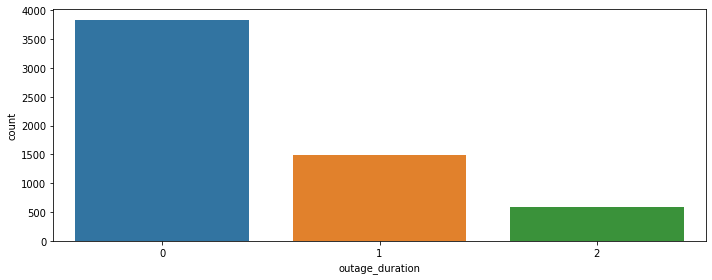

In [95]:
#count plot for Outage Duration 

plt.figure(figsize = (10,4))
sns.countplot(train_df['outage_duration'])
plt.tight_layout()
plt.show()

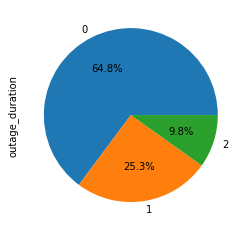

In [96]:
train_df.outage_duration.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### There is clear class imbalance in the train data

### Outage for the users with percentage representations.

In [97]:
val=list(train_df['outage_duration'].value_counts())
for i in range(len(val)):
    print("Outage type",train_df['outage_duration'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

Outage type 0 65 %
Outage type 1 25 %
Outage type 2 10 %


### Outage Duration

### As there are three different Outage durations

### Converting to appropriate datatype

In [98]:
categorical_list4 = ["area_code","outage_duration"]

In [99]:
train_df[categorical_list4] = train_df[categorical_list4].astype('category')

In [100]:
train_df.dtypes

id                    int64
area_code          category
outage_duration    category
dtype: object

In [101]:
train_df.describe(include='all')

,id,area_code,outage_duration
count,5904.000000,5904,5904.0
unique,NaN,876,3.0
top,NaN,area_821,0.0
freq,NaN,67,3827.0
mean,9323.841972,NaN,NaN
std,5338.654942,NaN,NaN
min,1.000000,NaN,NaN
25%,4763.500000,NaN,NaN
50%,9330.500000,NaN,NaN
75%,13932.750000,NaN,NaN


# Answers to the operations team

### Q1. Which areas are most prone to long outage durations?

In [102]:
# Filtering the area with outage duration is long, and getting the count of occurence
long_outage_area_count = train_df.loc[train_df.outage_duration==2].area_code.value_counts()

In [103]:
long_outage_area_count

area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
             ..
area_584      0
area_583      0
area_582      0
area_579      0
area_480      0
Name: area_code, Length: 876, dtype: int64

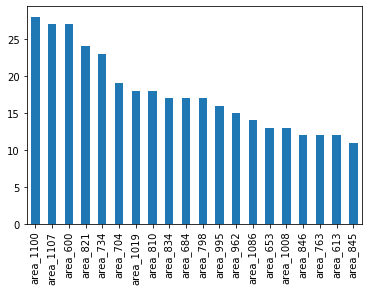

In [104]:
# Plotting top 20 areas most prone to long outage duration
long_outage_area_count.nlargest(20).plot(kind='bar')
plt.show()

In [105]:
train_df.columns

Index(['id', 'area_code', 'outage_duration'], dtype='object')

### From the above graph we clearly see that Area_1100 has more Outages and is more Prone to outages!!!

### And Top five areas most prone to outages are..

### Defining a function to remove the text from the area code

In [106]:
def str_to_num(string):
    return int(string.split("_")[1])

In [107]:
train_df["area_code"]=train_df["area_code"].apply(str_to_num)

In [108]:
train_df.head()

,id,area_code,outage_duration
0,13366,415,1
1,6783,474,0
2,9519,931,1
3,10202,700,1
4,4555,600,2


### Merging the Train Data with Outage Data

In [109]:
train_data = train_df.merge(outage_df,how="left",left_on=["id"],right_on=["id"])

In [110]:
train_data.head()

,id,area_code,outage_duration,outage_type_1,outage_type_2,outage_type_4,outage_type_6
0,13366,415,1,0,0,1,0
1,6783,474,0,0,1,0,0
2,9519,931,1,0,1,0,0
3,10202,700,1,1,0,0,0
4,4555,600,2,0,1,0,0


In [111]:
train_data.shape

(5904, 7)

In [112]:
train_data.set_index("id",inplace=True)

In [113]:
train_data.shape

(5904, 6)

In [114]:
train_data.head()

,area_code,outage_duration,outage_type_1,outage_type_2,outage_type_4,outage_type_6
id,,,,,,
13366,415,1,0,0,1,0
6783,474,0,0,1,0,0
9519,931,1,0,1,0,0
10202,700,1,1,0,0,0
4555,600,2,0,1,0,0


In [115]:
train_data.describe()

,outage_type_1,outage_type_2,outage_type_4,outage_type_6
count,5904.000000,5904.000000,5904.000000,5904.000000
mean,0.457317,0.486958,0.051829,0.003896
std,0.498217,0.499872,0.221701,0.062299
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


### Number Num represents number of outages of each type in an area to understand in which area what kind of outage is more so that we can focus on reducing it

In [116]:
train_data.shape

(5904, 6)

### Q2. Which broadband types are suspect of long outage durations?

In [117]:
# Filtering long outage_duration, merging the train_data with broadband_df, getting the sum along axis=0 , sorting in descending
broadband_types_long_outage = train_df.loc[train_df.outage_duration==2][['id']]\
                                .merge(broadband_df,on='id').sum().drop(index='id')\
                                    .sort_values(ascending=False)
print(broadband_types_long_outage)

ADSL 1     544
ADSL 2      82
Fiber       35
ADSL 2+     26
Cable        9
BPL          4
dtype: int64


## OBSERVATION

#### As we can see the long outage duration has ADSL 1 as the most common type of broadband followed by other ADSL types.

## Visualize the same in a bar chart

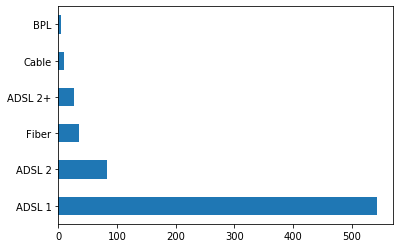

In [118]:
broadband_types_long_outage.plot(kind='barh')
plt.show()

### Q3. Any other recommendations to improve the detection of outage durations?

# Test Data

## Read Test Data

In [119]:
test_df = pd.read_csv("/home/datasets/exam/finalhackathon/test_data.csv")

### See the first five records

In [120]:
test_df.head()

,id,area_code
0,3340,area_344
1,14067,area_933
2,1134,area_16
3,27,area_793
4,9793,area_344


In [121]:
test_df.nunique()

id           1477
area_code     531
dtype: int64

### Number of records and columns

In [122]:
train_df.shape

(5904, 3)

### Display data type

In [123]:
test_df.dtypes

id            int64
area_code    object
dtype: object

### Converting to appropriate datatype

In [124]:
test_df.area_code = test_df.area_code.astype('category')

In [125]:
test_df.dtypes

id              int64
area_code    category
dtype: object

In [126]:
def str_to_num(string):
    return int(string.split("_")[1])

In [127]:
test_df["area_code"]=test_df["area_code"].apply(str_to_num)

In [128]:
test_df.head()

,id,area_code
0,3340,344
1,14067,933
2,1134,16
3,27,793
4,9793,344


In [129]:
test_df.shape

(1477, 2)

### Merging the Test Data with Outage Data

In [130]:
test_data = test_df.merge(outage_df,how="left",left_on=["id"],right_on=["id"])

In [131]:
test_data.head()

,id,area_code,outage_type_1,outage_type_2,outage_type_4,outage_type_6
0,3340,344,0,0,1,0
1,14067,933,1,0,0,0
2,1134,16,1,0,0,0
3,27,793,1,0,0,0
4,9793,344,0,1,0,0


In [132]:
test_data.shape

(1477, 6)

In [133]:
test_data.set_index("id",inplace=True)

In [134]:
test_data.shape

(1477, 5)

In [135]:
test_data.head()

,area_code,outage_type_1,outage_type_2,outage_type_4,outage_type_6
id,,,,,
3340,344,0,0,1,0
14067,933,1,0,0,0
1134,16,1,0,0,0
27,793,1,0,0,0
9793,344,0,1,0,0


In [136]:
test_data.describe(include="all")

,area_code,outage_type_1,outage_type_2,outage_type_4,outage_type_6
count,1477.0,1477.000000,1477.000000,1477.000000,1477.000000
unique,531.0,NaN,NaN,NaN,NaN
top,734.0,NaN,NaN,NaN,NaN
freq,18.0,NaN,NaN,NaN,NaN
mean,NaN,0.457007,0.484766,0.055518,0.002708
std,NaN,0.498317,0.499937,0.229066,0.051987
min,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,1.000000,1.000000,0.000000,0.000000


### Merging train data with the other dataframes

In [137]:
train_dfs = [train_data,broadband_df,report_df,server_df]
test_dfs = [test_data,broadband_df,report_df,server_df]
train_final = reduce(lambda left,right: pd.merge(left,right,on='id'), train_dfs)
test_final =  reduce(lambda left,right: pd.merge(left,right,on='id'), test_dfs)

In [138]:
test_final.shape

(1477, 451)

In [139]:
train_final.columns

Index(['id', 'area_code', 'outage_duration', 'outage_type_1', 'outage_type_2',
       'outage_type_4', 'outage_type_6', 'ADSL 1', 'ADSL 2', 'ADSL 2+',
       ...
       'transit_server_type_5', 'transit_server_type_50',
       'transit_server_type_51', 'transit_server_type_52',
       'transit_server_type_53', 'transit_server_type_54',
       'transit_server_type_6', 'transit_server_type_7',
       'transit_server_type_8', 'transit_server_type_9'],
      dtype='object', length=452)

In [140]:
test_final.columns

Index(['id', 'area_code', 'outage_type_1', 'outage_type_2', 'outage_type_4',
       'outage_type_6', 'ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL',
       ...
       'transit_server_type_5', 'transit_server_type_50',
       'transit_server_type_51', 'transit_server_type_52',
       'transit_server_type_53', 'transit_server_type_54',
       'transit_server_type_6', 'transit_server_type_7',
       'transit_server_type_8', 'transit_server_type_9'],
      dtype='object', length=451)

In [141]:
train_final.shape,test_final.shape

((5904, 452), (1477, 451))

In [142]:
train_final.head()

,id,area_code,outage_duration,outage_type_1,outage_type_2,outage_type_4,outage_type_6,ADSL 1,ADSL 2,ADSL 2+,...,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
0,13366,415,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6783,474,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9519,931,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10202,700,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4555,600,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
test_final.head()

,id,area_code,outage_type_1,outage_type_2,outage_type_4,outage_type_6,ADSL 1,ADSL 2,ADSL 2+,BPL,...,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
0,3340,344,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14067,933,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1134,16,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,793,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9793,344,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Computation of cross-tabulation of two factors

In [144]:
pd.crosstab(train_final['ADSL 1'],train_final['outage_duration'])

outage_duration,0,1,2
ADSL 1,,,
0,2144,477,37
1,1683,1019,544


In [145]:
pd.crosstab(train_final['ADSL 2'],train_final['outage_duration'])

outage_duration,0,1,2
ADSL 2,,,
0,1585,969,499
1,2242,527,82


In [146]:
pd.crosstab(train_final['ADSL 2+'],train_final['outage_duration'])

outage_duration,0,1,2
ADSL 2+,,,
0,3764,1384,555
1,63,112,26


In [147]:
pd.crosstab(train_final['BPL'],train_final['outage_duration'])

outage_duration,0,1,2
BPL,,,
0,3793,1473,577
1,34,23,4


In [148]:
pd.crosstab(train_final['Cable'],train_final['outage_duration'])

outage_duration,0,1,2
Cable,,,
0,3734,1419,572
1,93,77,9


In [149]:
pd.crosstab(train_final['outage_type_1'],train_final['outage_duration'])

outage_duration,0,1,2
outage_type_1,,,
0,2409,596,199
1,1418,900,382


In [150]:
pd.crosstab(train_final['outage_type_2'],train_final['outage_duration'])

outage_duration,0,1,2
outage_type_2,,,
0,1698,949,382
1,2129,547,199


In [151]:
pd.crosstab(train_final['outage_type_4'],train_final['outage_duration'])

outage_duration,0,1,2
outage_type_4,,,
0,3560,1457,581
1,267,39,0


In [152]:
pd.crosstab(train_final['outage_type_6'],train_final['outage_duration'])

outage_duration,0,1,2
outage_type_6,,,
0,3814,1486,581
1,13,10,0


In [153]:
pd.crosstab(train_final['transit_server_type_11'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_11,,,
0,2476,698,257
1,1351,798,324


In [154]:
pd.crosstab(train_final['transit_server_type_35'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_35,,,
0,1989,1176,581
1,1838,320,0


In [155]:
pd.crosstab(train_final['transit_server_type_41'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_41,,,
0,3826,1496,581
1,1,0,0


In [156]:
pd.crosstab(train_final['transit_server_type_37'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_37,,,
0,3823,1496,581
1,4,0,0


In [157]:
pd.crosstab(train_final['transit_server_type_31'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_31,,,
0,3826,1495,580
1,1,1,1


In [158]:
pd.crosstab(train_final['transit_server_type_12'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_12,,,
0,3826,1495,581
1,1,1,0


In [159]:
pd.crosstab(train_final['transit_server_type_25'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_25,,,
0,3826,1496,581
1,1,0,0


In [160]:
pd.crosstab(train_final['transit_server_type_1'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_1,,,
0,3826,1496,581
1,1,0,0


In [161]:
pd.crosstab(train_final['transit_server_type_51'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_51,,,
0,3824,1496,581
1,3,0,0


In [162]:
pd.crosstab(train_final['transit_server_type_48'],train_final['outage_duration'])

outage_duration,0,1,2
transit_server_type_48,,,
0,3826,1496,581
1,1,0,0


## Univariate Analysis on Categorical Columns

In [163]:
def barplot(column,df):
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 30, percentage, ha="center")

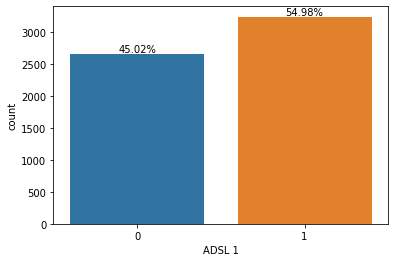

In [164]:
barplot("ADSL 1",train_final)

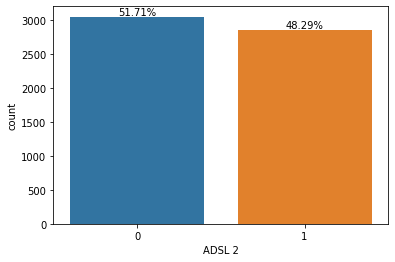

In [165]:
barplot("ADSL 2",train_final)

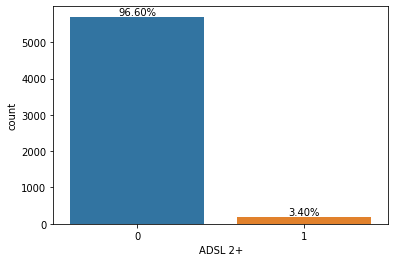

In [166]:
barplot("ADSL 2+",train_final)

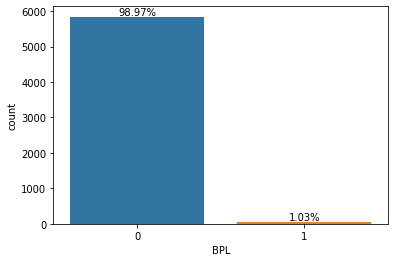

In [167]:
barplot("BPL",train_final)

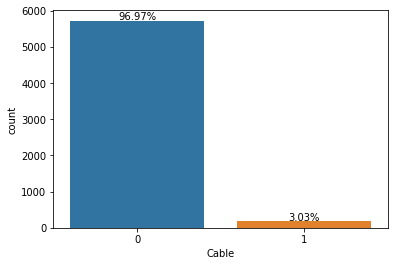

In [168]:
barplot("Cable",train_final)

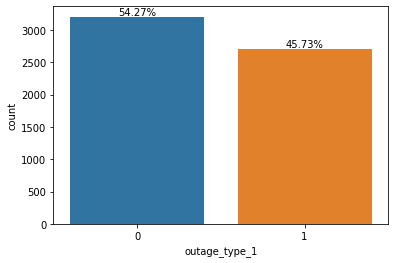

In [169]:
barplot("outage_type_1",train_final)

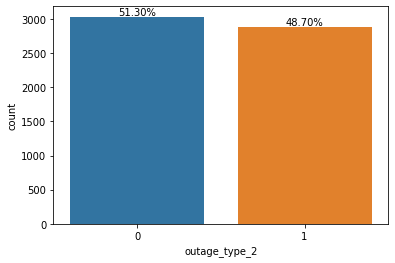

In [170]:
barplot("outage_type_2",train_final)

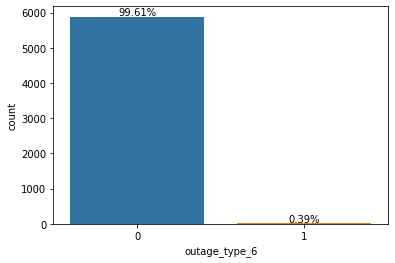

In [171]:
barplot("outage_type_6",train_final)

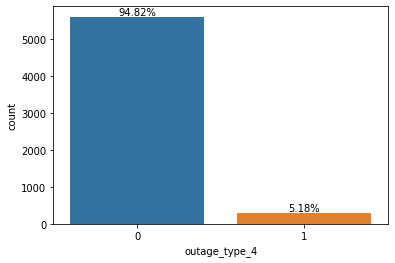

In [172]:
barplot("outage_type_4",train_final)

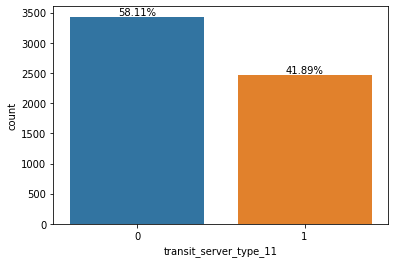

In [173]:
barplot("transit_server_type_11",train_final)

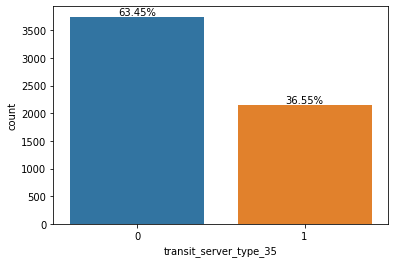

In [174]:
barplot("transit_server_type_35",train_final)

### Dropping Of Id

In [177]:
train_final.drop(['id'], axis=1, inplace=True)

In [178]:
test_final.drop(['id'], axis=1, inplace=True)

In [179]:
train_final.columns

Index(['area_code', 'outage_duration', 'outage_type_1', 'outage_type_2',
       'outage_type_4', 'outage_type_6', 'ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL',
       ...
       'transit_server_type_5', 'transit_server_type_50',
       'transit_server_type_51', 'transit_server_type_52',
       'transit_server_type_53', 'transit_server_type_54',
       'transit_server_type_6', 'transit_server_type_7',
       'transit_server_type_8', 'transit_server_type_9'],
      dtype='object', length=451)

In [180]:
test_final.columns

Index(['area_code', 'outage_type_1', 'outage_type_2', 'outage_type_4',
       'outage_type_6', 'ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL', 'Cable',
       ...
       'transit_server_type_5', 'transit_server_type_50',
       'transit_server_type_51', 'transit_server_type_52',
       'transit_server_type_53', 'transit_server_type_54',
       'transit_server_type_6', 'transit_server_type_7',
       'transit_server_type_8', 'transit_server_type_9'],
      dtype='object', length=450)

In [181]:
train_final.shape

(5904, 451)

In [182]:
test_final.shape

(1477, 450)

## Splitting the data

In [183]:
y=train_final["outage_duration"]
X=train_final.drop('outage_duration', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)  

In [184]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((4723, 450), (4723,), (1181, 450), (1181,))

In [185]:
X_train.columns

Index(['area_code', 'outage_type_1', 'outage_type_2', 'outage_type_4',
       'outage_type_6', 'ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL', 'Cable',
       ...
       'transit_server_type_5', 'transit_server_type_50',
       'transit_server_type_51', 'transit_server_type_52',
       'transit_server_type_53', 'transit_server_type_54',
       'transit_server_type_6', 'transit_server_type_7',
       'transit_server_type_8', 'transit_server_type_9'],
      dtype='object', length=450)

In [186]:
X_val.columns

Index(['area_code', 'outage_type_1', 'outage_type_2', 'outage_type_4',
       'outage_type_6', 'ADSL 1', 'ADSL 2', 'ADSL 2+', 'BPL', 'Cable',
       ...
       'transit_server_type_5', 'transit_server_type_50',
       'transit_server_type_51', 'transit_server_type_52',
       'transit_server_type_53', 'transit_server_type_54',
       'transit_server_type_6', 'transit_server_type_7',
       'transit_server_type_8', 'transit_server_type_9'],
      dtype='object', length=450)

### Converting all columns X_train and X_val in category

In [187]:
cat_attr=X_train.columns

In [188]:
X_train[cat_attr] = X_train[cat_attr].astype('category')

In [189]:
X_train.dtypes

area_code                 category
outage_type_1             category
outage_type_2             category
outage_type_4             category
outage_type_6             category
                            ...   
transit_server_type_54    category
transit_server_type_6     category
transit_server_type_7     category
transit_server_type_8     category
transit_server_type_9     category
Length: 450, dtype: object

In [190]:
X_val[cat_attr] = X_val[cat_attr].astype('category')

In [191]:
X_val.dtypes

area_code                 category
outage_type_1             category
outage_type_2             category
outage_type_4             category
outage_type_6             category
                            ...   
transit_server_type_54    category
transit_server_type_6     category
transit_server_type_7     category
transit_server_type_8     category
transit_server_type_9     category
Length: 450, dtype: object

In [192]:
y_train.value_counts()

0    3061
1    1197
2     465
Name: outage_duration, dtype: int64

In [193]:
print(y_train.value_counts(normalize=True)*100)
print("\n")
print(y_val.value_counts(normalize=True)*100)

0    64.810502
1    25.344061
2     9.845437
Name: outage_duration, dtype: float64


0    64.860288
1    25.317528
2     9.822185
Name: outage_duration, dtype: float64


# Model Building

### Using Decision Tree as the base model

## Decision Tree

In [194]:
clf_dt = DecisionTreeClassifier(max_depth=10)

In [195]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [196]:
y_pred_train = clf_dt.predict(X_train)
y_pred_val = clf_dt.predict(X_val)

In [197]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [198]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1_score_macro', 
                               'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1_score_macro'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_accuracy  = accuracy_score(train_actual, train_predicted)
    train_recall    = recall_score(train_actual, train_predicted, average="macro")
    train_precision = precision_score(train_actual, train_predicted, average="macro")
    train_f1score   = f1_score(train_actual, train_predicted, average="macro")
    
    test_accuracy   = accuracy_score(test_actual, test_predicted)
    test_recall     = recall_score(test_actual, test_predicted, average="macro")
    test_precision  = precision_score(test_actual, test_predicted, average="macro")
    test_f1score    = f1_score(test_actual, test_predicted, average="macro")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                  train_accuracy, train_recall, train_precision, train_f1score,
                                                  test_accuracy, test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [199]:
scores = get_metrics(y_train, y_pred_train, y_pred_val, y_val, "DecisionTrees", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_score_macro,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_score_macro
0,DecisionTrees,0.812619,0.750197,0.786455,0.763974,0.724809,0.652218,0.628025,0.635599


In [200]:
classifcation_report_train_test(y_train, y_pred_train, y_val, y_pred_val)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8363    0.9144    0.8736      3061
           1     0.7424    0.5706    0.6453      1197
           2     0.7807    0.7656    0.7731       465

    accuracy                         0.8126      4723
   macro avg     0.7865    0.7502    0.7640      4723
weighted avg     0.8070    0.8126    0.8058      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.7782    0.8564    0.8154       766
           1     0.5973    0.4415    0.5077       299
           2     0.5812    0.5862    0.5837       116

    accuracy                         0.7248      1181
   macro avg     0.6522    0.6280    0.6356      1181
weighted avg     0.7130    0.7248    0.7147      1181



## GridSearch CV

In [201]:
clf_dt_gs = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5],
            
              'min_samples_leaf': [2]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_dt_gs, parameters, cv=5, scoring='recall', verbose=50, n_jobs=-1, refit=True)

In [202]:
gs.fit(X_train, y_train )

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [2]},
             scoring='recall', verbose=50)

In [203]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}

In [204]:
train_pred_dt = gs.predict(X_train)
test_pred_dt = gs.predict(X_val)

In [205]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accuracy : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average="macro"))
    print("Precision: ", precision_score(act, pred,average="macro"))
    print("F1_score : ", f1_score(act, pred,average="macro"))

In [206]:
print("--Train--")
evaluate_model(y_train, train_pred_dt)

--Train--
Confusion Matrix 
 [[2910   33  118]
 [ 969  157   71]
 [ 150   12  303]]
Accuracy :  0.7135295363116663
Recall   :  0.5778146184764527
Precision:  0.7051149900962527
F1_score :  0.5595164480306858


In [207]:
print("--Test--")
evaluate_model(y_val, test_pred_dt)

--Test--
Confusion Matrix 
 [[726  14  26]
 [240  39  20]
 [ 35   4  77]]
Accuracy :  0.7129551227773073
Recall   :  0.5806695216360488
Precision:  0.6785005039177054
F1_score :  0.5617281122524358


# Random Forest

In [208]:
clf_rf = RandomForestClassifier()

In [209]:
clf_rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [210]:
y_pred_train1 = clf_rf.predict(X_train)
y_pred_val1 = clf_rf.predict(X_val)

In [211]:
classifcation_report_train_test(y_train, y_pred_train1, y_val, y_pred_val1)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3061
           1     1.0000    1.0000    1.0000      1197
           2     1.0000    1.0000    1.0000       465

    accuracy                         1.0000      4723
   macro avg     1.0000    1.0000    1.0000      4723
weighted avg     1.0000    1.0000    1.0000      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8070    0.8460    0.8260       766
           1     0.5859    0.5017    0.5405       299
           2     0.6393    0.6724    0.6555       116

    accuracy                         0.7417      1181
   macro avg     0.6774    0.6733    0.6740      1181
weighted avg     0.7345    0.7417    0.7370      1181



In [212]:
scores = get_metrics(y_train, y_pred_train1, y_val, y_pred_val1, "RandomForest", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_score_macro,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_score_macro
0,DecisionTrees,0.812619,0.750197,0.786455,0.763974,0.724809,0.652218,0.628025,0.635599
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.741744,0.673346,0.677419,0.674002


# AdaBoost

In [213]:
clf_adaboost =  AdaBoostClassifier()

In [214]:
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [215]:
y_pred_train2 = clf_adaboost.predict(X_train)
y_pred_val2 = clf_adaboost.predict(X_val)

In [216]:
classifcation_report_train_test(y_train, y_pred_train2, y_val, y_pred_val2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.7676    0.9095    0.8325      3061
           1     0.6754    0.3651    0.4740      1197
           2     0.6526    0.6301    0.6411       465

    accuracy                         0.7440      4723
   macro avg     0.6985    0.6349    0.6492      4723
weighted avg     0.7329    0.7440    0.7228      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.7656    0.8995    0.8271       766
           1     0.6519    0.3445    0.4508       299
           2     0.6341    0.6724    0.6527       116

    accuracy                         0.7367      1181
   macro avg     0.6839    0.6388    0.6435      1181
weighted avg     0.7239    0.7367    0.7147      1181



In [217]:
scores = get_metrics(y_train, y_pred_train2, y_val, y_pred_val2, "Adaboost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_score_macro,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_score_macro
0,DecisionTrees,0.812619,0.750197,0.786455,0.763974,0.724809,0.652218,0.628025,0.635599
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.741744,0.673346,0.677419,0.674002
2,Adaboost,0.744019,0.634898,0.698521,0.649214,0.736664,0.638791,0.683867,0.643539


# Gradient Boost

In [218]:
clf_gbm = GradientBoostingClassifier()

In [219]:
clf_gbm.fit(X=X_train, y=y_train)

GradientBoostingClassifier()

In [220]:
y_pred_train3 = clf_gbm.predict(X_train)
y_pred_val3 = clf_gbm.predict(X_val)

In [221]:
classifcation_report_train_test(y_train, y_pred_train3, y_val, y_pred_val3)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8161    0.9206    0.8652      3061
           1     0.7778    0.4561    0.5750      1197
           2     0.6761    0.8258    0.7435       465

    accuracy                         0.7936      4723
   macro avg     0.7566    0.7342    0.7279      4723
weighted avg     0.7926    0.7936    0.7797      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.7844    0.8930    0.8352       766
           1     0.6686    0.3779    0.4829       299
           2     0.6214    0.7500    0.6797       116

    accuracy                         0.7485      1181
   macro avg     0.6915    0.6736    0.6659      1181
weighted avg     0.7391    0.7485    0.7307      1181



In [222]:
scores = get_metrics(y_train, y_pred_train3, y_val, y_pred_val3, "GBM", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_score_macro,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_score_macro
0,DecisionTrees,0.812619,0.750197,0.786455,0.763974,0.724809,0.652218,0.628025,0.635599
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.741744,0.673346,0.677419,0.674002
2,Adaboost,0.744019,0.634898,0.698521,0.649214,0.736664,0.638791,0.683867,0.643539
3,GBM,0.793563,0.734187,0.756645,0.727906,0.748518,0.673626,0.691490,0.665919


# XGBoost

In [223]:
from xgboost import XGBClassifier

In [224]:
XGBClassifier(enable_categorical=True)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=True, gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [225]:
clf_xgb = XGBClassifier()

In [226]:
X_train=X_train.astype(int)

In [227]:
clf_xgb.fit(X=X_train, y=y_train)

[18:38:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [228]:
X_val=X_val.astype(int)

In [229]:
y_pred_train4 = clf_xgb.predict(X_train)
y_pred_val4 = clf_xgb.predict(X_val)

In [230]:
classifcation_report_train_test(y_train, y_pred_train4, y_val, y_pred_val4)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9080    0.9412    0.9243      3061
           1     0.8612    0.7519    0.8029      1197
           2     0.8356    0.9075    0.8701       465

    accuracy                         0.8899      4723
   macro avg     0.8683    0.8669    0.8657      4723
weighted avg     0.8890    0.8899    0.8882      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8214    0.8525    0.8366       766
           1     0.6240    0.5217    0.5683       299
           2     0.6176    0.7241    0.6667       116

    accuracy                         0.7561      1181
   macro avg     0.6877    0.6995    0.6905      1181
weighted avg     0.7514    0.7561    0.7520      1181



In [231]:
scores = get_metrics(y_train, y_pred_train4, y_val, y_pred_val4, "XGBoost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_score_macro,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_score_macro
0,DecisionTrees,0.812619,0.750197,0.786455,0.763974,0.724809,0.652218,0.628025,0.635599
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.741744,0.673346,0.677419,0.674002
2,Adaboost,0.744019,0.634898,0.698521,0.649214,0.736664,0.638791,0.683867,0.643539
3,GBM,0.793563,0.734187,0.756645,0.727906,0.748518,0.673626,0.691490,0.665919
4,XGBoost,0.889900,0.866867,0.868287,0.865748,0.756139,0.699452,0.687677,0.690539


In [235]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [236]:
CV_XGB.fit(X=X_train, y=y_train)

[18:43:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

## Find best model

In [237]:
best_xgb_model = CV_XGB.best_estimator_

In [238]:
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.7592655788843845 {'colsample_bytree': 0.8, 'max_depth': 6, 'n_estimators': 50}


In [239]:
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
y_pred_train5 = best_xgb_model.predict(X_train)
y_pred_val5 = best_xgb_model.predict(X_val)

In [241]:
classifcation_report_train_test(y_train, y_pred_train5, y_val, y_pred_val5)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8794    0.9291    0.9036      3061
           1     0.8282    0.6725    0.7423      1197
           2     0.7640    0.8495    0.8045       465

    accuracy                         0.8562      4723
   macro avg     0.8239    0.8170    0.8168      4723
weighted avg     0.8551    0.8562    0.8529      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8111    0.8577    0.8338       766
           1     0.6250    0.4849    0.5461       299
           2     0.6331    0.7586    0.6902       116

    accuracy                         0.7536      1181
   macro avg     0.6897    0.7004    0.6900      1181
weighted avg     0.7465    0.7536    0.7468      1181



In [242]:
scores = get_metrics(y_train, y_pred_train5, y_val, y_pred_val5, "best_xgb", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_score_macro,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_score_macro
0,DecisionTrees,0.812619,0.750197,0.786455,0.763974,0.724809,0.652218,0.628025,0.635599
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.741744,0.673346,0.677419,0.674002
2,Adaboost,0.744019,0.634898,0.698521,0.649214,0.736664,0.638791,0.683867,0.643539
3,GBM,0.793563,0.734187,0.756645,0.727906,0.748518,0.673626,0.691490,0.665919
4,XGBoost,0.889900,0.866867,0.868287,0.865748,0.756139,0.699452,0.687677,0.690539
5,best_xgb,0.856235,0.817028,0.823873,0.816777,0.753599,0.700424,0.689735,0.690031


In [243]:
test_final.shape

(1477, 450)

# Predictions On Test Data

## Final test predictions using DecisionTrees

In [244]:
test_final.shape

(1477, 450)

In [245]:
final_test_pred_clf_dt = clf_dt.predict(test_final)

In [246]:
final_test_pred_clf_dt

array([0, 0, 2, ..., 0, 1, 1])

In [247]:
final_test_predictions_clf_dt = pd.DataFrame(final_test_pred_clf_dt,columns=['outage_duration'],index=None)

In [248]:
final_test_predictions_clf_dt.to_csv('test_predictions_18.csv')

In [249]:
final_test_predictions_clf_dt.head()

,outage_duration
0,0
1,0
2,2
3,0
4,0


In [250]:
final_test_predictions_clf_dt['outage_duration'].value_counts(normalize=True)*100

0    70.819228
1    19.160460
2    10.020311
Name: outage_duration, dtype: float64

In [251]:
final_test_predictions_clf_dt.nunique()

outage_duration    3
dtype: int64

# Score = 63%

## Final test predictions using RandomForest

In [252]:
final_test_pred_clf_rf = clf_rf.predict(test_final)

In [254]:
final_test_pred_clf_rf

array([0, 0, 2, ..., 0, 1, 0])

In [255]:
final_test_predictions_clf_rf = pd.DataFrame(final_test_pred_clf_rf,columns=['outage_duration'],index=None)

In [256]:
final_test_predictions_clf_rf.to_csv('test_predictions_16.csv')

In [257]:
final_test_predictions_clf_rf.head()

,outage_duration
0,0
1,0
2,2
3,0
4,0


In [258]:
final_test_predictions_clf_rf['outage_duration'].value_counts(normalize=True)*100

0    67.704807
1    21.191605
2    11.103588
Name: outage_duration, dtype: float64

In [259]:
final_test_predictions_clf_rf.nunique()

outage_duration    3
dtype: int64

# SCORE = 66%

## Final test predictions using Adaboost

In [260]:
test_final.head()

,area_code,outage_type_1,outage_type_2,outage_type_4,outage_type_6,ADSL 1,ADSL 2,ADSL 2+,BPL,Cable,...,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
0,344,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,933,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,793,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,344,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
final_test_pred = clf_adaboost.predict(test_final)

In [262]:
final_test_pred

array([0, 0, 2, ..., 0, 0, 0])

In [263]:
final_test_predictions = pd.DataFrame(final_test_pred,columns=['outage_duration'],index=None)

In [264]:
final_test_predictions.to_csv('test_predictions_8.csv')

In [265]:
final_test_predictions.head()

,outage_duration
0,0
1,0
2,2
3,0
4,0


In [266]:
final_test_predictions['outage_duration'].value_counts(normalize=True)*100

0    76.371022
1    13.540961
2    10.088016
Name: outage_duration, dtype: float64

In [267]:
final_test_predictions.nunique()

outage_duration    3
dtype: int64

# SCORE = 61%

# Final test predictions using GBM

In [268]:
final_test_pred_clf_gbm = clf_gbm.predict(test_final)

In [269]:
final_test_pred_clf_gbm

array([0, 0, 2, ..., 0, 0, 1])

In [270]:
final_test_predictions_clf_gbm = pd.DataFrame(final_test_pred_clf_gbm,columns=['outage_duration'],index=None)

In [271]:
final_test_predictions_clf_gbm.to_csv('test_predictions_19.csv')

In [272]:
final_test_predictions_clf_gbm .head()

,outage_duration
0,0
1,0
2,2
3,0
4,0


In [273]:
final_test_predictions_clf_gbm['outage_duration'].value_counts(normalize=True)*100

0    73.188896
1    14.082600
2    12.728504
Name: outage_duration, dtype: float64

In [274]:
final_test_predictions_clf_gbm.nunique()

outage_duration    3
dtype: int64

## Final test predictions using XGBoost

In [275]:
from xgboost import XGBClassifier

In [276]:
XGBClassifier(enable_categorical=True)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=True, gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [277]:
final_test_pred_clf_xgb = XGBClassifier()

In [278]:
test_final=test_final.astype(int)

In [279]:
final_test_pred_clf_xgb = clf_xgb.predict(test_final)

In [280]:
final_test_pred_clf_xgb

array([0, 0, 2, ..., 0, 1, 1])

In [281]:
final_test_predictions_clf_xgb = pd.DataFrame(final_test_pred_clf_xgb,columns=['outage_duration'])

In [282]:
final_test_predictions_clf_xgb.head()

,outage_duration
0,0
1,0
2,2
3,0
4,0


In [283]:
final_test_predictions_clf_xgb['outage_duration'].value_counts(normalize=True)*100

0    67.501693
1    19.634394
2    12.863913
Name: outage_duration, dtype: float64

In [284]:
final_test_predictions_clf_xgb.nunique()

outage_duration    3
dtype: int64

In [285]:
final_test_predictions_clf_xgb.to_csv('test_predictions_17.csv')

# SCORE = 69%

## Final test predictions using best_xgb

In [286]:
final_test_pred_best_xgb = best_xgb_model.predict(test_final)

In [287]:
final_test_pred_best_xgb

array([0, 0, 2, ..., 0, 1, 0])

In [288]:
final_test_predictions_best_xgb = pd.DataFrame(final_test_pred_best_xgb,columns=['outage_duration'])

In [289]:
final_test_predictions_best_xgb.head()

,outage_duration
0,0
1,0
2,2
3,0
4,0


In [290]:
final_test_predictions_best_xgb['outage_duration'].value_counts(normalize=True)*100

0    68.449560
1    18.957346
2    12.593094
Name: outage_duration, dtype: float64

In [291]:
final_test_predictions_best_xgb.nunique()

outage_duration    3
dtype: int64

In [292]:
final_test_predictions_best_xgb.to_csv('test_predictions_18.csv')

# SCORE = 68%

## After All Parameter Tuning XGBoost gave us the better Outcome for the given Dataset.

# Summary

# Next Steps

# SUBMISSIONS

# END